In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)


In [47]:
df= pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [48]:
df.shape


(13320, 9)

In [49]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [50]:
df1=df.drop(['area_type','availability', 'balcony','society'],axis='columns')
df1.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [51]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [52]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [53]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [54]:
df2['bhk']=df2['size'].apply(lambda x:x.split(' ')[0])
df2['bhk'] = df2['bhk'].astype(float)

<ipython-input-54-ba2d786de48f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x:x.split(' ')[0])
<ipython-input-54-ba2d786de48f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['bhk'].astype(float)


In [55]:
df2.head()


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0


In [56]:
df2.drop(['size'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0


In [57]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [58]:
df2[~df2['total_sqft'].apply(is_float)]


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2.0
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2.0
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2.0
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3.0
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2.0
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2.0


In [59]:
def sqft_to_num(x):
 tokens= x.split('-')
 if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
 try:
    return float(x)
 except:
    return None
       

In [60]:
df2['total_sqft']= df2['total_sqft'].apply(sqft_to_num)

<ipython-input-60-1853a7ca1c84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft']= df2['total_sqft'].apply(sqft_to_num)


In [61]:
df2.head(11)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6.0


In [62]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                 4.0
Name: 30, dtype: object

In [63]:
df3=df2.copy()
df3['pricepersqft']=df3['price']*100000/df3['total_sqft']
df3.head()


,location,size,total_sqft,bath,price,bhk,pricepersqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [64]:
len(df3.location.unique())

1304

In [65]:
location_stats= df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [66]:
len(location_stats[location_stats<10])

1051

In [67]:
req_location= location_stats[location_stats<10]
df3.location= df3.location.apply(lambda x:'other' if x in req_location else x)
len(df3.location.unique())


254

In [68]:
df3[(df3.total_sqft/df3.bhk<300)].head()


,location,size,total_sqft,bath,price,bhk,pricepersqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [69]:
df4=df3[~(df3.total_sqft/df3.bhk<300)]
df4.shape


(12502, 7)

In [70]:
def remove_pps_outliers (d) :
    df_out = pd.DataFrame ()
    for key, subdf in d.groupby('location'):
        m = np.mean(subdf.pricepersqft)
        st = np. std (subdf.pricepersqft)
        reduced_df = subdf[(subdf.pricepersqft> (m-st)) & (subdf.pricepersqft<=(m+st))]
        df_out = pd. concat ([df_out, reduced_df],ignore_index=True)
    return df_out
    
df5 = remove_pps_outliers (df4)
df5. shape

(10226, 7)

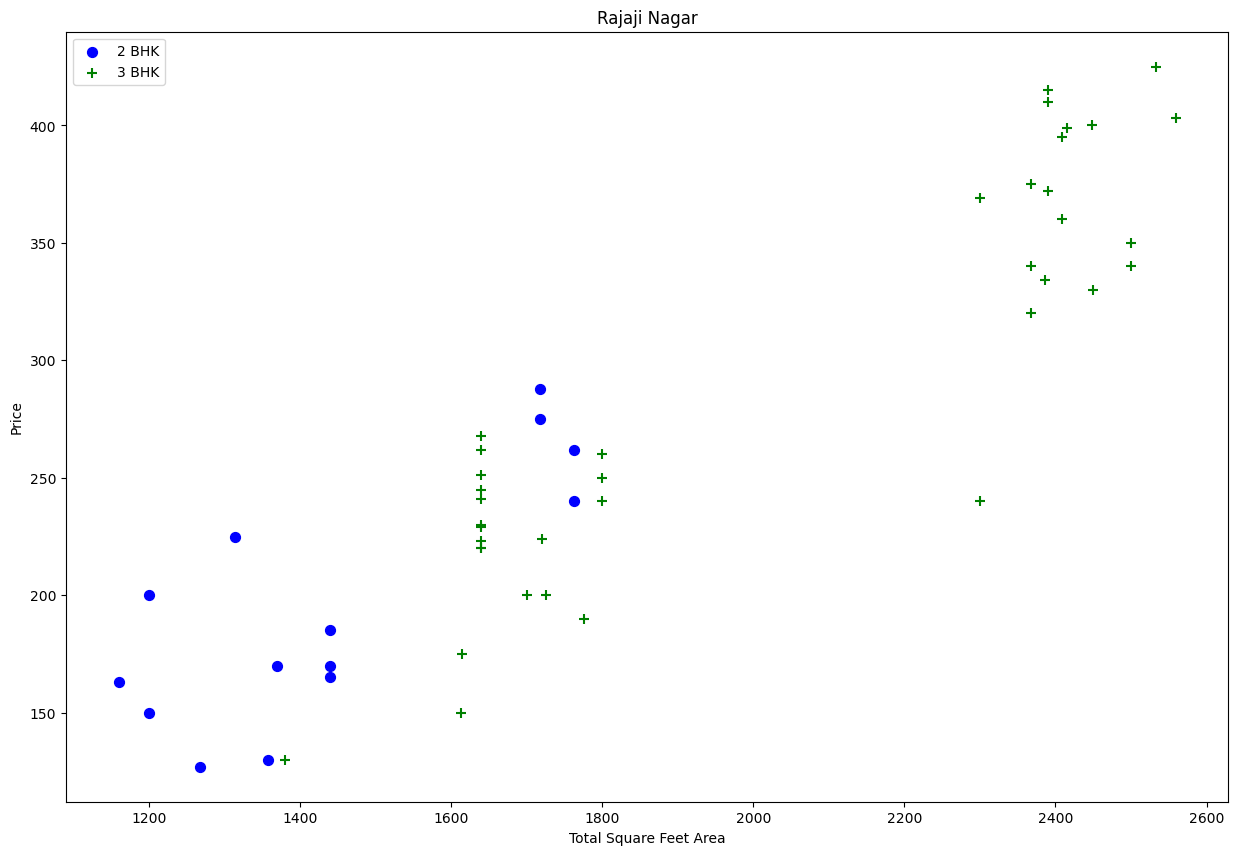

In [71]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib. rcParams['figure.figsize'] = (15,10)
    plt. scatter(bhk2. total_sqft,bhk2. price, color='blue',label='2 BHK', s=50)
    plt. scatter (bhk3. total_sqft,bhk3.price,marker='+', color='green' ,label='3 BHK', s=50)
    plt.xlabel ("Total Square Feet Area")
    plt. ylabel ("Price")
    plt. title(location)
    plt. legend ()

plot_scatter_chart(df5, "Rajaji Nagar")

In [72]:
def remove_bhk_outliers (df) :
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats [bhk] = {
            'mean': np. mean(bhk_df.pricepersqft),
            'std': np.std(bhk_df.pricepersqft),
            'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats. get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.pricepersqft<(stats['mean'])].index.values)
                # exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df6= remove_bhk_outliers (df5)
df6.shape

(7380, 7)

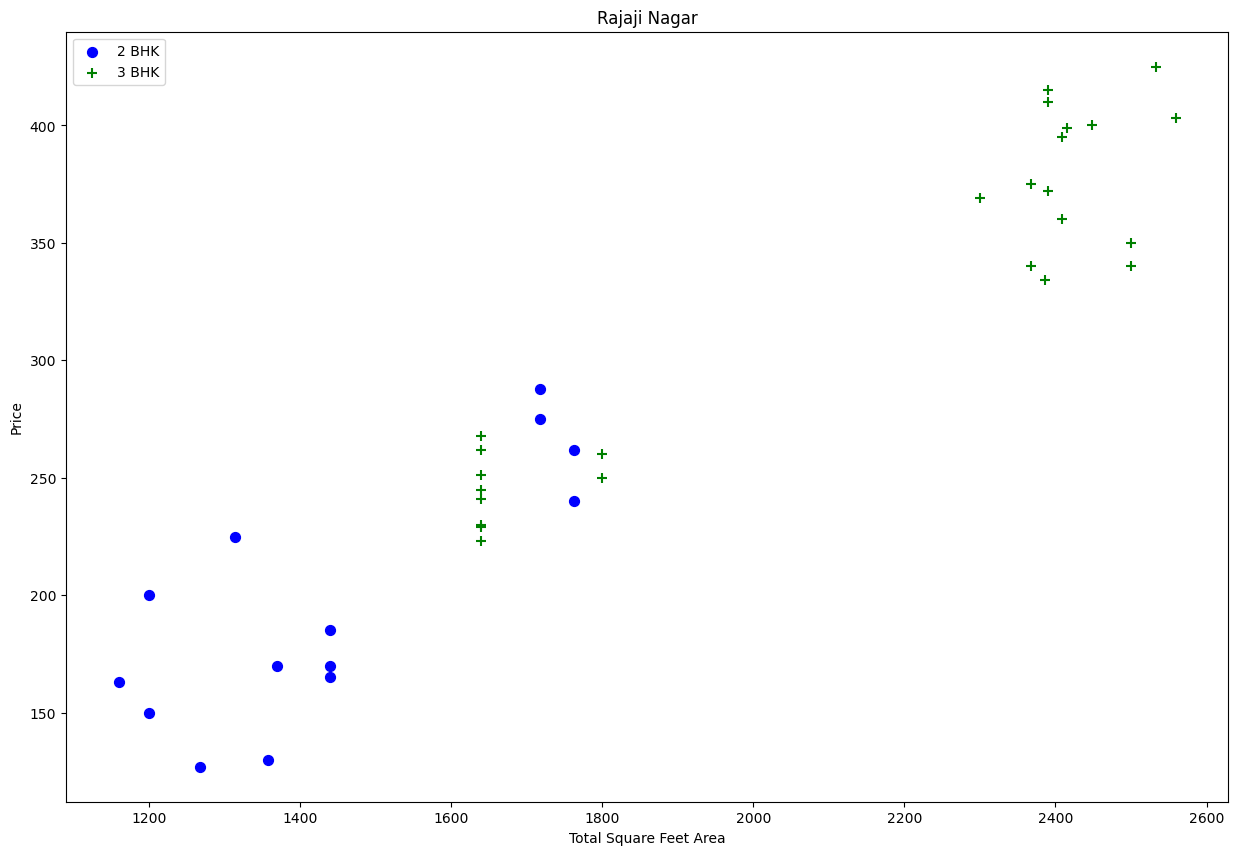

In [73]:
plot_scatter_chart(df6, "Rajaji Nagar")

Text(0, 0.5, 'Count')

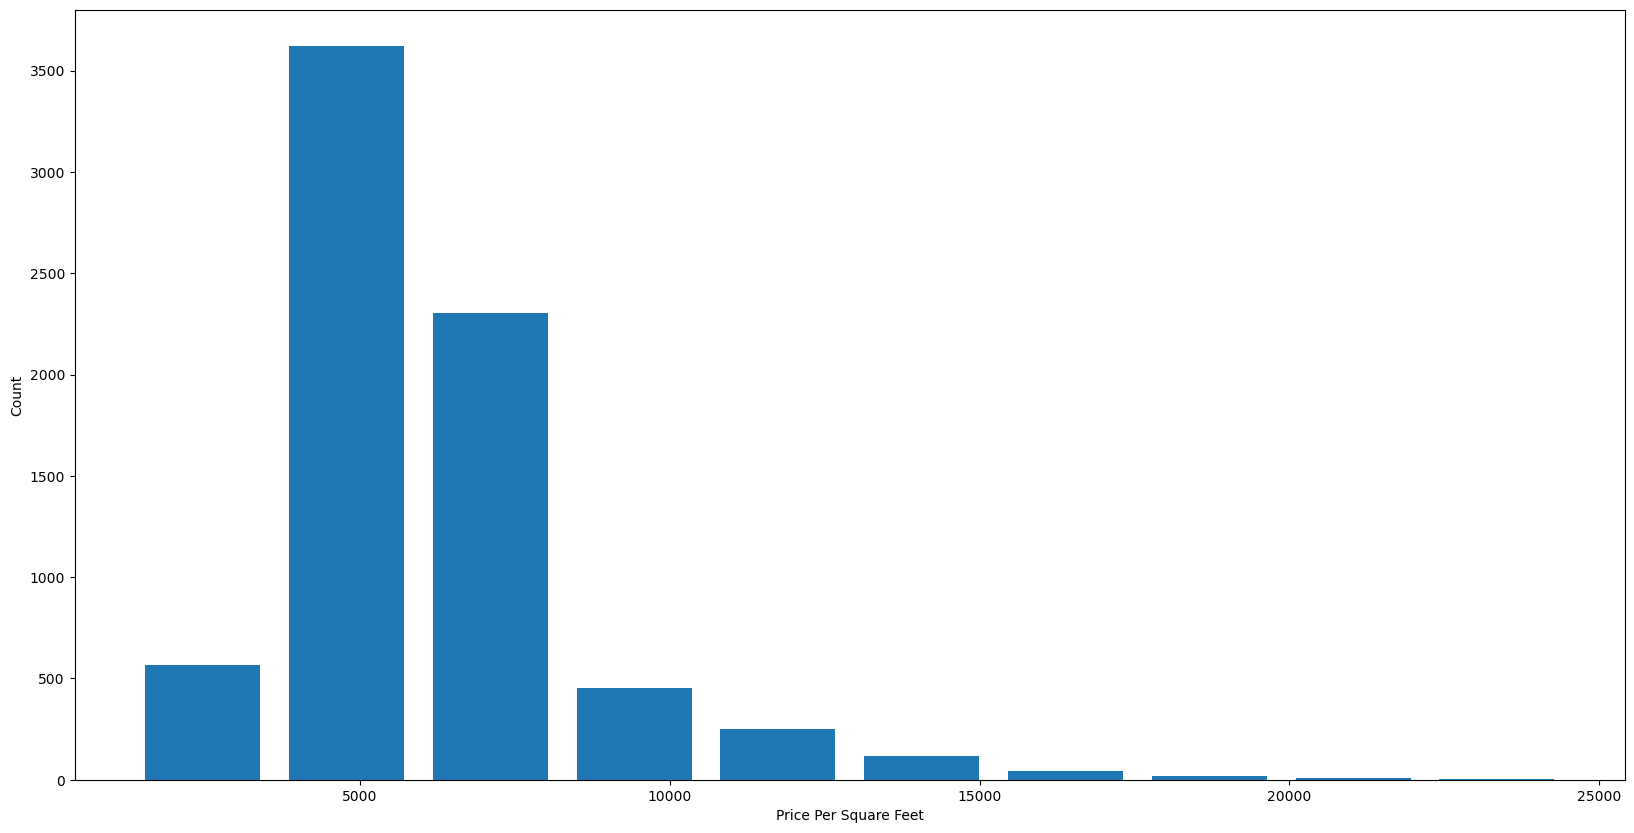

In [74]:
import matplotlib
matplotlib. rcParams["figure.figsize"] = (20,10)
plt.hist (df6. pricepersqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt. ylabel ("Count")

In [75]:
df7=df6[df6.bath<df6.bhk+2]
df7.shape

(7302, 7)

In [76]:
df8=df7.drop(['size','pricepersqft',], axis= 'columns')
df8.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0
5,Devarachikkanahalli,947.0,2.0,43.0,2.0


In [77]:
dummies=pd.get_dummies(df8.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df9=pd.concat([df8,dummies,dummies.drop('other',axis='columns')],axis='columns')
df9.head(3)
df10=df9.drop('location', axis='columns')
df10.head(5)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
X= df10.drop('price', axis='columns')
y=df10.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [95]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf. score(X_test,y_test)

0.8432266691593483

In [98]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84384229, 0.82909644, 0.83378618, 0.84849956, 0.81198277])

In [ ]:
from skearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(X,y):
algos= {
    'linear_regression' : {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
        },
    'lasso':{
        'model': Lasso()
        'params' :{
            'alpha':[1,2],
            'selection':['random', 'cyclic']
        }
    },
    'decision tree':{
        'model': DecisionTreeRegressor(),
        'params':{
            'criterion':['mse','friedman_mse'],
            'splitter': ['best', 'random']
        }
    }
}
scores =[]
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_stats=0)
for algo_name, config in algo.items():
        gs= GridSearchCV(config['model'], config['params'], cv=cv, return_train_scope=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
            
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)
    

In [107]:
def predict_price(location,sq_ft,bath,bhk):
    loc_index= np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sq_ft
    x[1]=bath
    x[2]=bhk
    if loc_index >= 0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]

In [108]:
predict_price('1st Phase JP Nagar',1000,2,2)

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1786915341.7825038

In [111]:
predict_price('1st Phase JP Nagar',5000,2,5)

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1786915646.2837133

In [112]:
import pickle 
with open('bengaluru_house_prices','wb') as f:
        pickle.dump(lr_clf,f)

In [114]:
import json
columns ={
    'data columns' :[col.lower() for col in X.columns]
}
with open("columns.json","w")as f:
    f.write(json.dumps(columns))
